In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("gym_members_exercise_tracking.csv")
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
df["Gender"] = le.fit_transform(df["Gender"]) # male:1, female:0
df["Workout_Type"] = le.fit_transform(df["Workout_Type"]) # Cardio:0, HIIT:1, Strength:2, Yoga:3

In [6]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,3,12.6,3.5,4,3,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,1,33.9,2.1,4,2,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,0,33.4,2.3,4,2,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,2,28.8,2.1,3,1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,2,29.2,2.8,3,1,14.39


In [7]:
df_copy = df.drop(["Workout_Type"], axis=1).copy()
df_copy.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import DecisionTreeClassifier

In [12]:
X = df_copy.drop(['Water_Intake (liters)',"Calories_Burned"],axis=1)

y = df_copy['Calories_Burned']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix
import pandas as pd

algorithms = [
    ("LR", LogisticRegression()),
    ("SVC", SVC(probability=True)),
    ("KNN", KNeighborsClassifier()),
    ("DTC", DecisionTreeClassifier()),
    ("SGDC", CalibratedClassifierCV(SGDClassifier())),
    ("NB", GaussianNB()),
    ("RF", RandomForestClassifier()),
]

models = {}
final_results = []

for name, model in algorithms:
    trained_model = model.fit(X_train, y_train)
    models[name] = trained_model

    # Predict
    y_pred = trained_model.predict(X_test)

    # Evaluate
    p_score = precision_score(y_test, y_pred, average='weighted')
    a_score = accuracy_score(y_test, y_pred)
    r_score = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    final_results.append((name, p_score, a_score, r_score, f1, cm))

# Save to CSV
cf = pd.DataFrame(final_results, columns=["Model", "Precision", "Accuracy", "Recall", "F1", "Confusion Matrix"])
cf.to_csv("model.csv", index=False)


/home/rajat/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/rajat/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rajat/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [15]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{model.__class__.__name__} — RMSE: {rmse:.4f}, R2 Score: {r2:.4f}")


In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
evaluate_model(lr, X_test, y_test)


LinearRegression — RMSE: 40.3616, R2 Score: 0.9805


In [17]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
evaluate_model(ridge, X_test, y_test)


Ridge — RMSE: 40.9147, R2 Score: 0.9799


In [18]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
evaluate_model(lasso, X_test, y_test)


Lasso — RMSE: 40.5387, R2 Score: 0.9803


In [19]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train, y_train)
evaluate_model(elastic, X_test, y_test)


ElasticNet — RMSE: 98.8012, R2 Score: 0.8830


In [20]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
evaluate_model(dt, X_test, y_test)


DecisionTreeRegressor — RMSE: 68.9342, R2 Score: 0.9430


In [21]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test)


RandomForestRegressor — RMSE: 47.2463, R2 Score: 0.9732


In [22]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
evaluate_model(gbr, X_test, y_test)


GradientBoostingRegressor — RMSE: 21.4428, R2 Score: 0.9945


In [25]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
evaluate_model(knn, X_test, y_test)

KNeighborsRegressor — RMSE: 221.9460, R2 Score: 0.4095


In [26]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
evaluate_model(svr, X_test, y_test)


SVR — RMSE: 288.3019, R2 Score: 0.0037


In [27]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500)
mlp.fit(X_train, y_train)
evaluate_model(mlp, X_test, y_test)


MLPRegressor — RMSE: 183.4263, R2 Score: 0.5967


/home/rajat/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [30]:
import matplotlib.pyplot as plt

def plot_predictions(model, X_test, y_test):
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{model.__class__.__name__} Prediction Plot")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # perfect line
    plt.grid(True)
    plt.show()


LinearRegression — RMSE: 40.3616, R2 Score: 0.9805


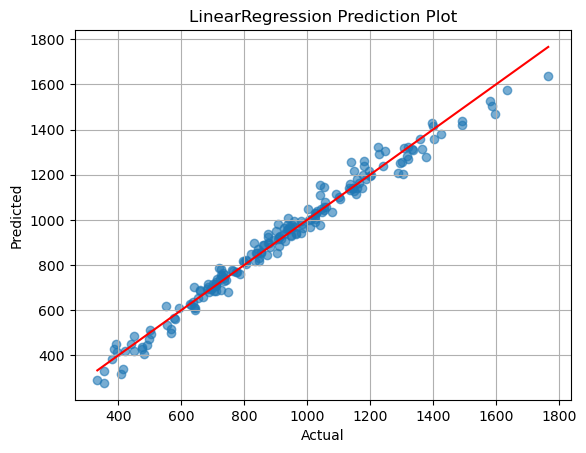

Ridge — RMSE: 40.9147, R2 Score: 0.9799


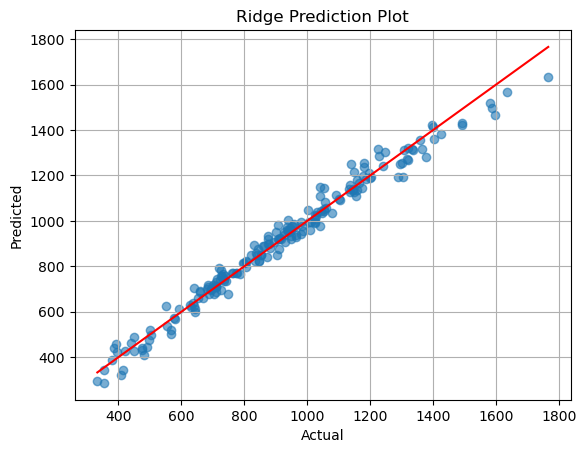

Lasso — RMSE: 40.5387, R2 Score: 0.9803


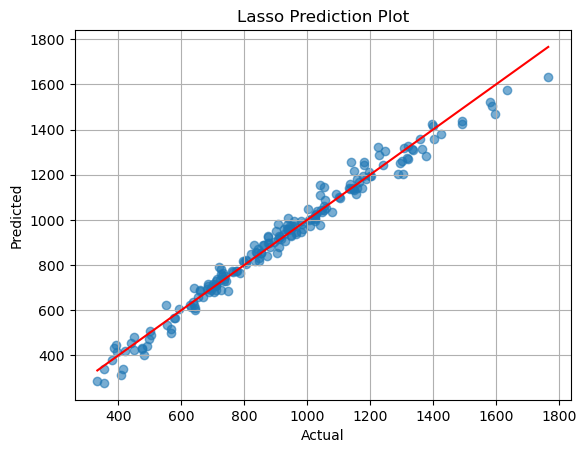

ElasticNet — RMSE: 98.8012, R2 Score: 0.8830


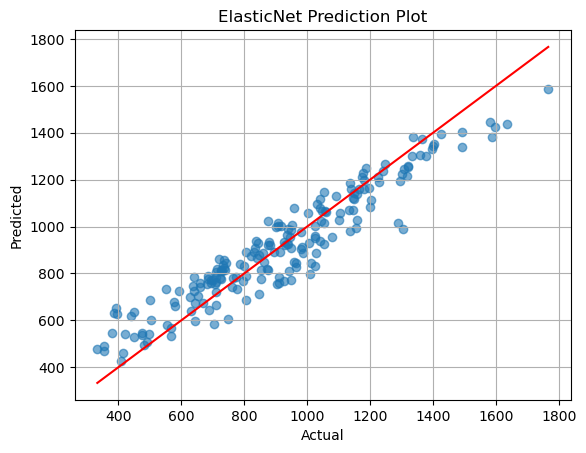

DecisionTreeRegressor — RMSE: 68.4415, R2 Score: 0.9439


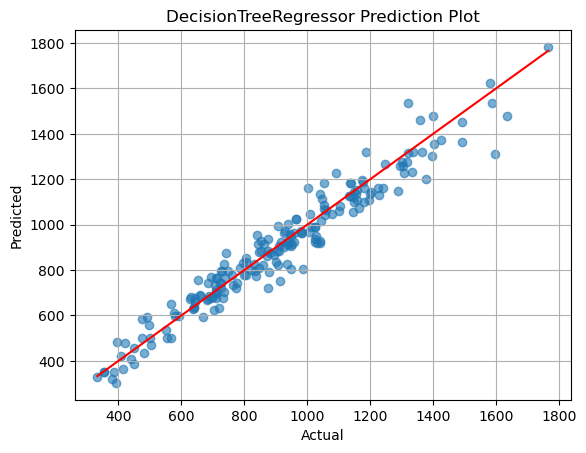

RandomForestRegressor — RMSE: 48.3237, R2 Score: 0.9720


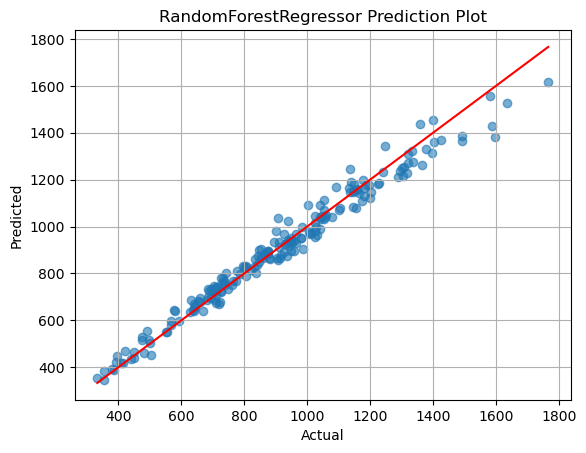

GradientBoostingRegressor — RMSE: 21.4330, R2 Score: 0.9945


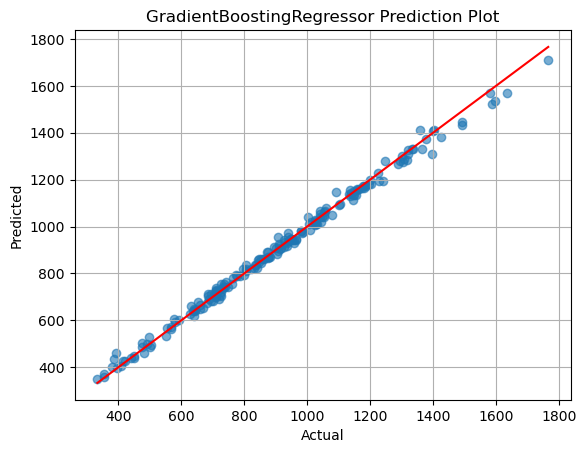

KNeighborsRegressor — RMSE: 221.9460, R2 Score: 0.4095


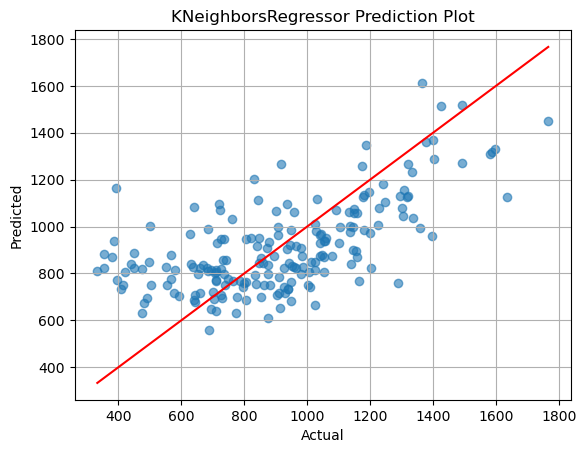

SVR — RMSE: 288.3019, R2 Score: 0.0037


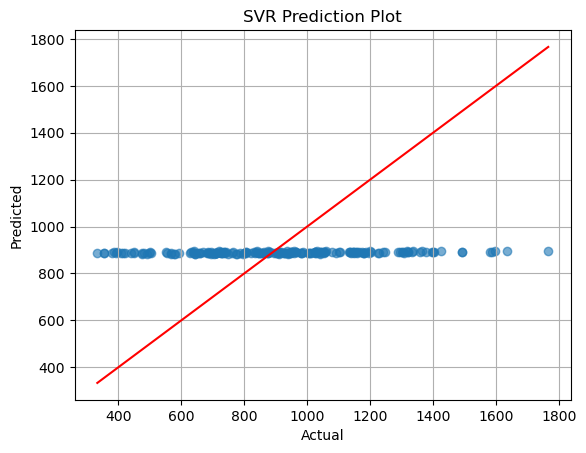

MLPRegressor — RMSE: 180.3192, R2 Score: 0.6102


/home/rajat/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


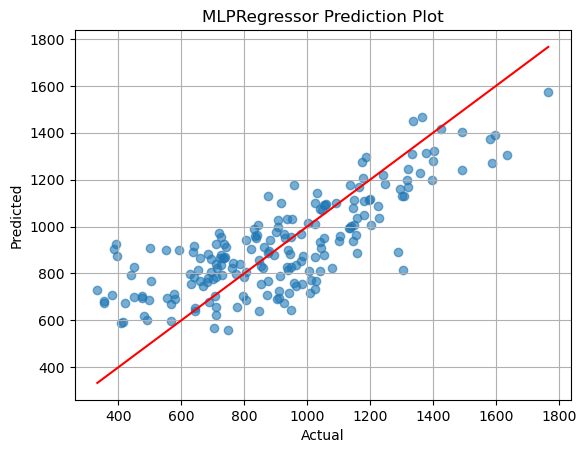

In [31]:
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=0.1),
    ElasticNet(alpha=0.1, l1_ratio=0.5),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    SVR(),
    MLPRegressor(max_iter=500)
]

for model in models:
    model.fit(X_train, y_train)
    evaluate_model(model, X_test, y_test)
    plot_predictions(model, X_test, y_test)
